# Regression Modelling

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
%matplotlib inline

In [29]:
# import library to display multiple outputs
from IPython.display import display

# Importing dataset
data = pd.read_csv('D:/Master/CDS503 Machine Learning/Project/Dataset/StudentsPerformance.csv')

# see some of it, their overall statistics and dimensions
display(data.head(5))
display(data.describe())
display(data.shape)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


(1000, 8)

Let's take a look at these score comparison on each other 

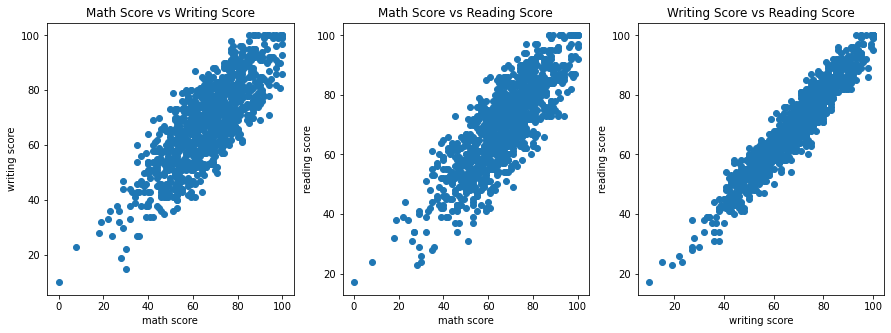

In [30]:
# size the figure to fit 3 figures on the same line
plt.figure(3,figsize=(15,5))

# subplot 1
plt.subplot(1,3,1)
# scatter plot 1
plt.scatter(x='math score', y='writing score',data=data)
plt.xlabel('math score')
plt.ylabel('writing score')
plt.title("Math Score vs Writing Score");

# subplot 2
plt.subplot(1,3,2)
#scatter plot 2
plt.scatter(x='math score', y='reading score',data=data)
plt.xlabel('math score')
plt.ylabel('reading score')
plt.title("Math Score vs Reading Score");

# subplot 3
plt.subplot(1,3,3)
#scatter plot 3
plt.scatter(x='writing score', y='reading score',data=data)
plt.xlabel('writing score')
plt.ylabel('reading score')
plt.title("Writing Score vs Reading Score");

# show the resulting plot
plt.show()

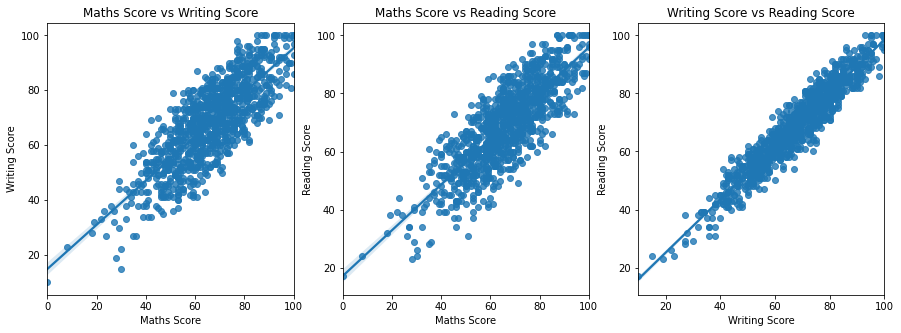

In [31]:
# size the figure to fit 3 figures on the same line
plt.figure(3,figsize=(15,5))

# subplot 1
plt.subplot(1,3,1)
#regression plot 1
sns.regplot(x='math score', y='writing score',data=data)
plt.xlabel("Maths Score")
plt.ylabel("Writing Score")
plt.title("Maths Score vs Writing Score")

# subplot 2
plt.subplot(1,3,2)
#regression plot 2
sns.regplot(x='math score', y='reading score',data=data)
plt.xlabel("Maths Score")
plt.ylabel("Reading Score")
plt.title("Maths Score vs Reading Score")

# subplot 3
plt.subplot(1,3,3)
#regression plot 3
sns.regplot(x='writing score', y='reading score',data=data)
plt.xlabel("Writing Score");
plt.ylabel("Reading Score")
plt.title("Writing Score vs Reading Score");

# show the resulting plot
plt.show()

1. Transforming all categorical data into numerical data

In [32]:
# convert categorical variable to numeric
data["gender_cleaned"] = np.where(data["gender"]=="male", 0, 1)
data["race/ethnicity_cleaned"] = np.where(data["race/ethnicity"]=="group A", 0,
                                         np.where(data["race/ethnicity"]=="group B", 1,
                                                np.where(data["race/ethnicity"]=="group C", 2,
                                                        np.where(data["race/ethnicity"]=="group D", 3, 4))))
data["parental_education_cleaned"] = np.where(data["parental level of education"]=="high school", 0,
                                         np.where(data["parental level of education"]=="some high school", 1,
                                                np.where(data["parental level of education"]=="some college", 2,
                                                         np.where(data["parental level of education"]=="bachelor's degree", 3,
                                                                  np.where(data["parental level of education"]=="associate's degree", 4, 5)))))
data["lunch_cleaned"] = np.where(data["lunch"]=="standard", 0, 1)
data["test_preparation_cleaned"] = np.where(data["test preparation course"]=="none", 0, 1)

In [33]:
print(data["gender_cleaned"].value_counts())
print(data["race/ethnicity_cleaned"].value_counts())
print(data["parental_education_cleaned"].value_counts())
print(data["lunch_cleaned"].value_counts())
print(data["test_preparation_cleaned"].value_counts())

1    518
0    482
Name: gender_cleaned, dtype: int64
2    319
3    262
1    190
4    140
0     89
Name: race/ethnicity_cleaned, dtype: int64
2    226
4    222
0    196
1    179
3    118
5     59
Name: parental_education_cleaned, dtype: int64
0    645
1    355
Name: lunch_cleaned, dtype: int64
0    642
1    358
Name: test_preparation_cleaned, dtype: int64


In [34]:
#remove the old attributes after cleaned
data = data.drop(columns=['lunch','gender','race/ethnicity','parental level of education','test preparation course'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   math score                  1000 non-null   int64
 1   reading score               1000 non-null   int64
 2   writing score               1000 non-null   int64
 3   gender_cleaned              1000 non-null   int32
 4   race/ethnicity_cleaned      1000 non-null   int32
 5   parental_education_cleaned  1000 non-null   int32
 6   lunch_cleaned               1000 non-null   int32
 7   test_preparation_cleaned    1000 non-null   int32
dtypes: int32(5), int64(3)
memory usage: 43.1 KB


In [35]:
corr_matrix = data.corr()
corr_matrix['math score'].sort_values(ascending=True)

lunch_cleaned                -0.350877
gender_cleaned               -0.167982
parental_education_cleaned    0.161414
test_preparation_cleaned      0.177702
race/ethnicity_cleaned        0.216415
writing score                 0.802642
reading score                 0.817580
math score                    1.000000
Name: math score, dtype: float64

Looks like writing and reading score close to math score.

In [36]:
#select specific/related features
used_features=[ 
    "reading score",
    "writing score",
]

x = data[used_features] # select all attributes
y = data["math score"] #class target

display(x.shape)

(1000, 2)

In [37]:
x = data [used_features]
y = data["math score"]

#import machine learning library to sample the data
from sklearn.model_selection import train_test_split

# split the data into training data and test data
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [38]:
#least square for linear regression
from sklearn.linear_model import LinearRegression
reg_ls = LinearRegression()

#fit method to train data
reg_ls.fit(x_train, y_train)
reg_ls.score(x_train, y_train)

#print intercept, coefficient
print('Estimated intercept coefficients: ', reg_ls.intercept_)
print('Number of coefficients: ', len(reg_ls.coef_))
print('Coefficients: ', reg_ls.coef_)

Estimated intercept coefficients:  5.816466220688255
Number of coefficients:  2
Coefficients:  [0.64334721 0.23321148]


In [39]:
pd.DataFrame(np.array((x_train.columns, reg_ls.coef_)).T, columns=['used_features', 'estimatedCoefficients'])

,used_features,estimatedCoefficients
0,reading score,0.643347
1,writing score,0.233211


In [40]:
#prediction
reg_ls.predict(x_test)[0:5]

array([69.39511516, 69.57203941, 47.07101207, 60.62952822, 73.7216214 ])

In [41]:
#true value 
y_test[0:5]

993    62
859    87
298    40
553    77
672    69
Name: math score, dtype: int64

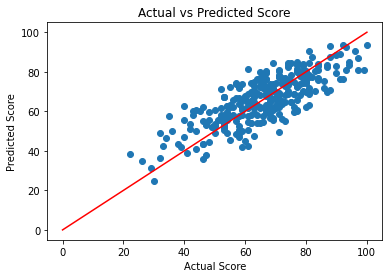

In [42]:
#prediction and plot regression
y_pred = reg_ls.predict(x_test)

# plot prediction and actual data
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Actual vs Predicted Score')

# plot a line, a perfect prediction would all fall on this line
x = np.linspace(0, 100, 200)
y = x
plt.plot(x, y, 'r')

In [43]:
# check error prediction
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

7.315471970275679
79.51141648093756
0.6051563489724487


Prediction Math Score from Writing Score and Reading Score shows 60.5% for R-squared

In [44]:
corr_matrix = data.corr()
corr_matrix['reading score'].sort_values(ascending=True)

lunch_cleaned                -0.229560
race/ethnicity_cleaned        0.145253
parental_education_cleaned    0.195295
test_preparation_cleaned      0.241780
gender_cleaned                0.244313
math score                    0.817580
writing score                 0.954598
reading score                 1.000000
Name: reading score, dtype: float64

In [45]:
#select specific/related features
used_features=[ 
    "math score",
    "writing score",
]

x = data[used_features] # select all attributes
y = data["reading score"] #class target

display(x.shape)

(1000, 2)

In [46]:
x = data [used_features]
y = data["reading score"]

#import machine learning library to sample the data
from sklearn.model_selection import train_test_split

# split the data into training data and test data
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [47]:
#least square for linear regression
from sklearn.linear_model import LinearRegression
reg_ls = LinearRegression()

#fit method to train data
reg_ls.fit(x_train, y_train)
reg_ls.score(x_train, y_train)

#print intercept, coefficient
print('Estimated intercept coefficients: ', reg_ls.intercept_)
print('Number of coefficients: ', len(reg_ls.coef_))
print('Coefficients: ', reg_ls.coef_)

Estimated intercept coefficients:  5.555576881283358
Number of coefficients:  2
Coefficients:  [0.15971378 0.78085187]


In [48]:
pd.DataFrame(np.array((x_train.columns, reg_ls.coef_)).T, columns=['used_features', 'estimatedCoefficients'])

,used_features,estimatedCoefficients
0,math score,0.159714
1,writing score,0.780852


In [49]:
#prediction
reg_ls.predict(x_test)[0:5]
#true value 
y_test[0:5]

993    72
859    73
298    46
553    62
672    78
Name: reading score, dtype: int64

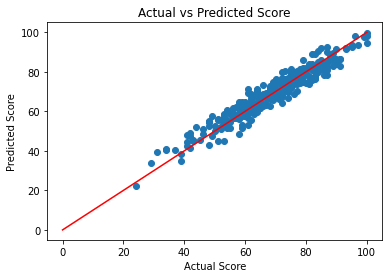

In [50]:
#prediction and plot regression
y_pred = reg_ls.predict(x_test)

# plot prediction and actual data
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Actual vs Predicted Score')

# plot a line, a perfect prediction would all fall on this line
x = np.linspace(0, 100, 200)
y = x
plt.plot(x, y, 'r')

In [51]:
# check error prediction
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

3.162679184393264
15.56039844552984
0.9221951506053814


Prediction Reading Score from Math Score and Writing Score shows 92.2% for R-squared

In [52]:
corr_matrix = data.corr()
corr_matrix['writing score'].sort_values(ascending=True)

lunch_cleaned                -0.245769
race/ethnicity_cleaned        0.165691
parental_education_cleaned    0.232843
gender_cleaned                0.301225
test_preparation_cleaned      0.312946
math score                    0.802642
reading score                 0.954598
writing score                 1.000000
Name: writing score, dtype: float64

In [53]:
#select specific/related features
used_features=[ 
    "math score",
    "reading score",
]

x = data[used_features] # select all attributes
y = data["writing score"] #class target

display(x.shape)

(1000, 2)

In [54]:
x = data [used_features]
y = data["writing score"]

#import machine learning library to sample the data
from sklearn.model_selection import train_test_split

# split the data into training data and test data
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [55]:
#least square for linear regression
from sklearn.linear_model import LinearRegression
reg_ls = LinearRegression()

#fit method to train data
reg_ls.fit(x_train, y_train)
reg_ls.score(x_train, y_train)

#print intercept, coefficient
print('Estimated intercept coefficients: ', reg_ls.intercept_)
print('Number of coefficients: ', len(reg_ls.coef_))
print('Coefficients: ', reg_ls.coef_)

Estimated intercept coefficients:  -1.2856918162661657
Number of coefficients:  2
Coefficients:  [0.06929029 0.93453193]


In [56]:
pd.DataFrame(np.array((x_train.columns, reg_ls.coef_)).T, columns=['used_features', 'estimatedCoefficients'])

,used_features,estimatedCoefficients
0,math score,0.0692903
1,reading score,0.934532


In [57]:
#prediction
reg_ls.predict(x_test)[0:5]
#true value 
y_test[0:5]

993    74
859    72
298    50
553    64
672    76
Name: writing score, dtype: int64

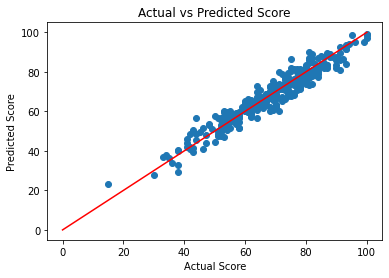

In [58]:
#prediction and plot regression
y_pred = reg_ls.predict(x_test)

# plot prediction and actual data
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Actual vs Predicted Score')

# plot a line, a perfect prediction would all fall on this line
x = np.linspace(0, 100, 200)
y = x
plt.plot(x, y, 'r')

In [59]:
# check error prediction
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

3.2731559518054754
16.44874775877235
0.9225636597777943


Prediction Writing Score from Math Score and Reading Score shows 92.2% for R-squared

In [60]:
#combine all 3 score into 1 single score
total_score = data['writing score'] + data['reading score'] + data['math score']
data['total_score'] = total_score
data.head()

,math score,reading score,writing score,gender_cleaned,race/ethnicity_cleaned,parental_education_cleaned,lunch_cleaned,test_preparation_cleaned,total_score
0,72,72,74,1,1,3,0,0,218
1,69,90,88,1,2,2,0,1,247
2,90,95,93,1,1,5,0,0,278
3,47,57,44,0,0,4,1,0,148
4,76,78,75,0,2,2,0,0,229


In [61]:
#get the average of total score
avg_total_score = data['total_score'] / 3
data['avg_total_score'] = avg_total_score

#drop column total score
data = data.drop(columns=['total_score'])
data.head()

,math score,reading score,writing score,gender_cleaned,race/ethnicity_cleaned,parental_education_cleaned,lunch_cleaned,test_preparation_cleaned,avg_total_score
0,72,72,74,1,1,3,0,0,72.666667
1,69,90,88,1,2,2,0,1,82.333333
2,90,95,93,1,1,5,0,0,92.666667
3,47,57,44,0,0,4,1,0,49.333333
4,76,78,75,0,2,2,0,0,76.333333


In [62]:
# import label encoder library to deal with categorical data
from sklearn.preprocessing import LabelEncoder

# select all columns except the last one (the target label)
x=data.iloc[:,:-1]

# set target categorical data label (the last attribute)
y=data.iloc[:,-1]

labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)
print (x)
print (y)

     math score  reading score  writing score  gender_cleaned  \
0            72             72             74               1   
1            69             90             88               1   
2            90             95             93               1   
3            47             57             44               0   
4            76             78             75               0   
..          ...            ...            ...             ...   
995          88             99             95               1   
996          62             55             55               0   
997          59             71             65               1   
998          68             78             77               1   
999          77             86             86               1   

     race/ethnicity_cleaned  parental_education_cleaned  lunch_cleaned  \
0                         1                           3              0   
1                         2                           2              0 

In [63]:
#select specific/related features
used_features=[ 
    "math score",
    "reading score",
    "writing score",
    "gender_cleaned",
    "race/ethnicity_cleaned",
    "parental_education_cleaned",
    "lunch_cleaned",
    "test_preparation_cleaned"
]

x = data[used_features] # select all attributes
y = data["avg_total_score"] #class target

display(x.shape)

(1000, 8)

Splitting the data into 70% training data and 30% test data

In [64]:
x = data [used_features]
y = data["avg_total_score"]

#import machine learning library to sample the data
from sklearn.model_selection import train_test_split

# split the data into training data and test data
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=0)

Regression with average score

In [65]:
#least square for linear regression
from sklearn.linear_model import LinearRegression
reg_ls = LinearRegression()

#fit method to train data
reg_ls.fit(x_train, y_train)
reg_ls.score(x_train, y_train)

#print intercept, coefficient
print('Estimated intercept coefficients: ', reg_ls.intercept_)
print('Number of coefficients: ', len(reg_ls.coef_))
print('Coefficients: ', reg_ls.coef_)

Estimated intercept coefficients:  -1.4210854715202004e-14
Number of coefficients:  8
Coefficients:  [ 3.33333333e-01  3.33333333e-01  3.33333333e-01  5.43835810e-16
 -1.99493200e-16 -1.55257751e-16 -2.73218947e-16  2.77122075e-16]


In [66]:
pd.DataFrame(np.array((x_train.columns, reg_ls.coef_)).T, columns=['used_features', 'estimatedCoefficients'])

,used_features,estimatedCoefficients
0,math score,0.333333
1,reading score,0.333333
2,writing score,0.333333
3,gender_cleaned,5.43836e-16
4,race/ethnicity_cleaned,-1.99493e-16
5,parental_education_cleaned,-1.55258e-16
6,lunch_cleaned,-2.73219e-16
7,test_preparation_cleaned,2.77122e-16


In [67]:
#prediction
reg_ls.predict(x_test)[0:5]

array([69.33333333, 77.33333333, 45.33333333, 67.66666667, 74.33333333])

In [68]:
#true value 
y_test[0:5]

993    69.333333
859    77.333333
298    45.333333
553    67.666667
672    74.333333
Name: avg_total_score, dtype: float64

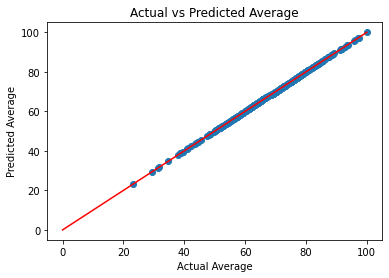

In [69]:
#prediction and plot regression
y_pred = reg_ls.predict(x_test)

# plot prediction and actual data
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Average')
plt.ylabel('Predicted Average')
plt.title('Actual vs Predicted Average')

# plot a line, a perfect prediction would all fall on this line
x = np.linspace(0, 100, 200)
y = x
plt.plot(x, y, 'r')

In [70]:
# check error prediction
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

1.0255500152804113e-14
1.4346750329619469e-28
1.0


Seems to be overfitting with average